###### This work is to solely for learning the algorithm not for predicting or analysis therefore not all data preprocessing techniques will be applied here. The concentration here is to understand the algorithm.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data
data = pd.read_csv('/Users/darshanagopal/Library/Mobile Documents/com~apple~CloudDocs/Code/Regression/data/breast-cancer.csv')

In [3]:
# Convert the target column to binary (0 for benign and 1 for malignant)
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})


In [4]:
# Split the data into training and test sets
train, test = train_test_split(data, random_state=40)


In [5]:
# Define the feature column and the target column
feature = 'radius_mean'
X_train = train[[feature]]
Y_train = train['diagnosis']

X_test = test[[feature]]
Y_test = test['diagnosis']


In [6]:
# Train the logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, Y_train)


LogisticRegression(max_iter=10000)

In [7]:
# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]

In [8]:
# Create a smooth curve for the logistic regression model
# Generate a range of values from the minimum to the maximum of the feature
x_values = np.linspace(X_test[feature].min(), X_test[feature].max(), 300).reshape(-1, 1)

# Predict probabilities for these values
y_values = model.predict_proba(x_values)[:, 1]


/Library/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


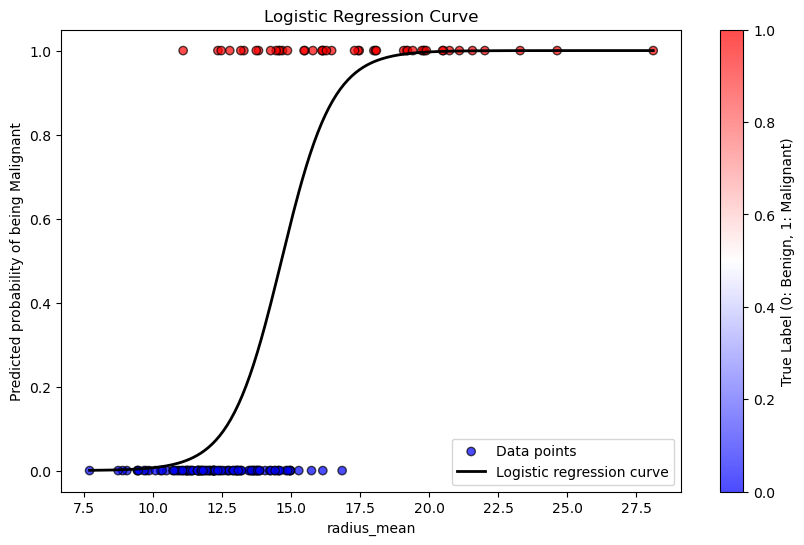

In [9]:

# Plot the data points and the logistic regression curve
plt.figure(figsize=(10, 6))
plt.scatter(X_test, Y_test, c=Y_test, cmap='bwr', alpha=0.7, edgecolor='k', label='Data points')
plt.plot(x_values, y_values, color='black', lw=2, label='Logistic regression curve')
plt.xlabel(feature)
plt.ylabel('Predicted probability of being Malignant')
plt.title('Logistic Regression Curve')
plt.colorbar(label='True Label (0: Benign, 1: Malignant)')
plt.legend()
plt.show()
